**Regresión logistica.**

*Breast cancer*

Hello, I'm Go1234550

**Importamos las librerías**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

**Cargamos el conjunto de datos**

Usaremos el dataset de breast_cancer de sklearn.

* Analizaremos las variables que lo conforman para seleccionar los datos con los que trabajaremos.

In [2]:
#Cargar datos del breast cancer
from sklearn.datasets import load_breast_cancer
#Mostrar el dataset
cancer = load_breast_cancer()
#Mostrar las claves del dataset
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
#Mostrar la descripcion del dataset
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

**Cargamos los datos en nuestras variables**

En este paso cargamos los valores de la variable dependiente y la independiente para nuestra prediccion.

Para este modelo, trabajaremos con todas las variables del dataset para aumentar la precisión.

In [4]:
#Asignamos nuestras variables independientes
X = cancer.data
#Asignamos nuestras variables dependientes 
y = cancer.target 

**Creacion de la clase de la regresion logistica**

Haremos uso del gradiente descendente.

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.losses = []
    #Funcion sigmoide
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    #Funcion de perdida
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    #Entrenamiento del modelo
    def fit(self, X, y):
        # Inicializar los parámetros del modelo
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradiente descendente para actualizar los parámetros
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Calcular la pérdida y guardarla para su visualización
            loss = self.loss(y_predicted, y)
            self.losses.append(loss)

            # Calcular gradientes
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Actualizar los parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    #Predicción
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

**Realizamos el split de nuestro conjunto de datos**

* Entrenamiento: 30%
* Prubeas: 70%

In [6]:
from sklearn.model_selection import train_test_split
#Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Realizamos el entrenamiento y prueba del modelo**

Para este proceso, utilizaremos la división del *dateset* mediante folds para su validación cruzada.

In [12]:
# Número de pliegues para la validación cruzada
num_folds = 5

# Dividir los datos de entrenamiento en pliegues
fold_size = len(X_train) // num_folds
X_folds = [X_train[i*fold_size:(i+1)*fold_size] for i in range(num_folds)]
y_folds = [y_train[i*fold_size:(i+1)*fold_size] for i in range(num_folds)]

# Lista para almacenar los puntajes de precisión de cada pliegue (MSE)
scores = []

# Iterar sobre los pliegues
for i in range(num_folds):
    # Separar el pliegue actual para validación
    X_valid, y_valid = X_folds[i], y_folds[i]
    
    # Crear y entrenar el modelo
    model = LogisticRegression(learning_rate=0.00001, num_iterations=10000)#(learning_rate=0.0002, num_iterations=1000000)
    model.fit(X_valid, y_valid)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular el MSE del pliegue actual
    fold_score = np.mean(y_pred == y_test)
    
    # Agregar el puntaje del pliegue a la lista de puntajes
    scores.append(fold_score)

# Calcular de puntaje promedio de MSE
print("Puntaje promedio de MSE:", np.mean(scores))

# Imprimir los puntajes de MSE de cada pliegue
print("Puntajes de MSE de cada pliegue:", scores)

Puntaje promedio de MSE: 0.9461988304093566
Puntajes de MSE de cada pliegue: [0.9181286549707602, 0.9590643274853801, 0.9532163742690059, 0.9473684210526315, 0.9532163742690059]


**Evaluamos el modelo**

Utilizaremos como recurso la matriz de confusión, denotando cada una de sus métricas.

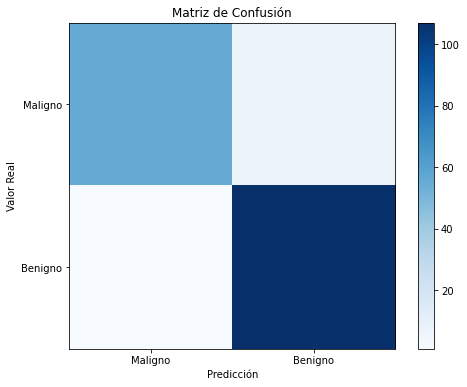

Matriz de confusión: 
[[ 56   7]
 [  1 107]]


In [13]:
#Calcular la precisión del modelo
cm = confusion_matrix(y_test, y_pred)

#Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['Maligno', 'Benigno'])
plt.yticks([0, 1], ['Maligno', 'Benigno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

#Mostramos los valores de la matriz de confusión
print("Matriz de confusión: ")
print(cm)



**Calculamos métricas a partir de la matriz de confusión**

In [18]:
#Mostramos la tasa de verdaderos positivos del modelo
true_positive_rate = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Tasa de verdaderos positivos: ", true_positive_rate)

#Mostramos la tasa de falsos positivos del modelo
false_positive_rate = cm[1, 0] / (cm[1, 0] + cm[1, 1])
print("Tasa de falsos positivos: ", false_positive_rate)

#Mostramos la precisión del modelo
acurracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print("Precisión del modelo: ", acurracy)

#Mostramos la especificidad del modelo
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Especificidad del modelo: ", specificity)



Tasa de verdaderos positivos:  0.8888888888888888
Tasa de falsos positivos:  0.009259259259259259
Precisión del modelo:  0.9532163742690059
Especificidad del modelo:  0.9907407407407407
